In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy
import statsmodels.api as sm
import warnings

/usr/local/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


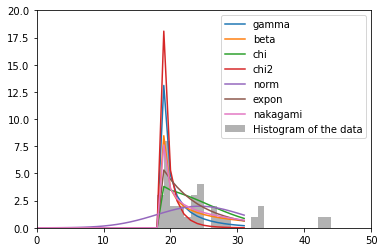

In [12]:
data = np.array([33.25,  21.75,  42.67,  19.33,  23.08,  19.83,  26.0,  24.41,
          21.41,  24.75,  19.08,  26.08,  27.08,  18.67,  23.42, 20.83,
          19.67,  18.67,  24.42,  20.92,  33.67,  19.25,  28.08, 22.83,
          43.83,  24.08,  32.5,   18.67,  19.0,   19.08,  23.75, 19.25])

size = 32
x = np.arange(size)
#y = scipy.int_(np.round_(scipy.stats.vonmises.rvs(5,size=size)*1)) #47
h = plt.hist(data, histtype='bar', bins=range(50), density=False, color='black', alpha=0.3, label='Histogram of the data')

dist_names = ['gamma', 'beta', 'chi', 'chi2', 'norm', 'expon', 'nakagami'] #gausshyper

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(data)
    arg = params[:-2]
    mu = params[-2]
    sigma = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=mu, scale=sigma) * size
    else:
        pdf_fitted = dist.pdf(x, loc=mu, scale=sigma) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,50)
    plt.ylim(0,20)
plt.legend(loc='upper right')
# plt.hist(data)
plt.show()